In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Input 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

folder_path = '.'
image_file_name = '/images_75.npy'
label_file_name = '/labels_75.npy'

images = np.load(folder_path+image_file_name)
images = np.expand_dims(images, axis=-1)
labels = np.load(folder_path+label_file_name)

def shuffle_in_unison(a, b):
    if len(a) != len(b):
        raise ValueError('Two arrays are incompatible for shuffling in unison')
    p = np.random.permutation(len(a))
    return a[p], b[p]

images, labels = shuffle_in_unison(images,labels)

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/vol/home/s4557093/.conda/envs/tf-gpu/lib/python3.9/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/vol/home/s4557093/.conda/envs/tf-gpu/lib/python3.9/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/vol/home/s4557093/.conda/envs/tf-gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
  File "/vol/home/s4557093/.conda/envs/tf-gpu/lib/python3.9/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
  File "/vol/home/s4557093/.conda/envs/tf-gpu/lib/python3.9/site-packages/traitlets/traitlets.py", line 649, i

In [2]:
def train_test_valid_split(a,b,train=0.8,test=0.1,valid=0.1,shuffle=True,check_data = False):
    if len(a) != len(b):
        raise ValueError('Two arrays are incompatible for splitting in unison')
    total_percentage = train + test + valid
    if total_percentage != 1:
        raise ValueError(f'''Data will not be split correctly \n 
        Total percentage of data used :{total_percentage*100}% \n 
        Training = {train*100}%, testing = {test*100}%, validation = {valid*100}%''')
    if shuffle == True:
        a, b = shuffle_in_unison(a,b)
    
    train_idx = int(len(a)*train)
    test_idx = train_idx+int(len(a)*test)
    valid_idx = len(a)
    train_x = a[:train_idx]
    test_x = a[train_idx:test_idx]
    valid_x = a[test_idx:]
    train_y = b[:train_idx]
    test_y = b[train_idx:test_idx]
    valid_y = b[test_idx:]

    
    if check_data:
        check_len_match = len(train_x) + len(test_x) + len(valid_x)
        print(f'Size of train, test and valid: {len(train_x)},{len(test_x)},{len(valid_x)}')
        if check_len_match == len(a):
            print('yippee')
        else:
            print('no:(')
    
    return train_x, train_y, test_x, test_y, valid_x, valid_y

In [ ]:
def check_random_sample(a,b,c=None):
    rand_int=np.random.randint(0,len(a))
    plt.imshow(a[rand_int],cmap='gray')
    plt.show()
    if isinstance(b, list):
        hour_true = int(b[0][rand_int].item()*12/(2*np.pi))
        minute_true = int(b[1][rand_int].item()*60/(2*np.pi))
        print(f"The time is {hour_true:02d}:{minute_true:02d}")
        if c:   
            hour_pred = int(c[0][rand_int].item()*12/(2*np.pi))
            minute_pred = int(c[1][rand_int].item()*60/(2*np.pi))
            print(f'The predicted time is {hour_pred:02d}:{minute_pred:02d}')
        
    else:
        print(b[rand_int])

[[ 4 56]
 [10 18]
 [ 4 33]
 ...
 [ 0  1]
 [ 0  4]
 [10 23]]
6.283185307179586
0.0 6.178465552059927
0.0 6.178465552059927
[[2.0943951 ]
 [5.23598776]
 [2.0943951 ]
 ...
 [0.        ]
 [0.        ]
 [5.23598776]]


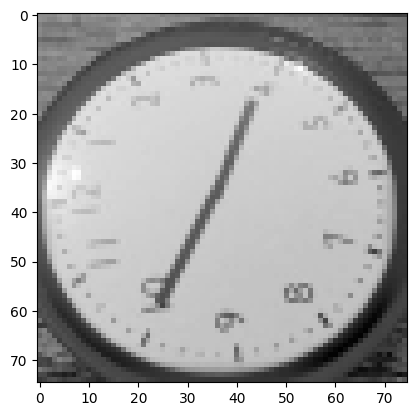

Hour: 0, Minute: 59


In [ ]:
from tensorflow.keras.utils import to_categorical
scaler = MinMaxScaler(feature_range=(0, 1))
train_x, train_y, test_x, test_y, valid_x, valid_y = train_test_valid_split(images, labels)

train_x = train_x.astype('float32') / 255.0
valid_x = valid_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

hour_train = (train_y[:,0]*2*np.pi)/12
minute_train = (train_y[:,1]*2*np.pi)/60

hour_valid = (valid_y[:,0]*2*np.pi)/12
minute_valid = (valid_y[:,1]*2*np.pi)/60

hour_test = (test_y[:,0]*2*np.pi)/12
minute_test = (test_y[:,1]*2*np.pi)/60

hour_train, minute_train = 

train_y=[np.c_[hour_train],np.c_[minute_train]]
valid_y=[np.c_[hour_valid],np.c_[minute_valid]]
test_y=[np.c_[hour_test],np.c_[minute_test]]
check_random_sample(train_x,train_y)

In [ ]:
train_input_dim = (75, 75, 1)

In [ ]:
import os
import datetime
if os.path.isdir("logs"):
    print('directory exists')
else:
    os.mkdir('./logs')
    os.mkdir('./logs/fit')
if os.path.isdir('models'):
    print('model directory exists')
else:
    os.mkdir('./models')
if os.path.isdir('plots'):
    print('plot directory exists')
else:
    os.mkdir('./plots')
if os.path.isdir('history'):
    print('history directory exists')
else:
    os.mkdir('./history')


In [ ]:
from os import listdir
from os.path import isfile, join
def get_iter(path,file_prefix=None):

    files = [f for f in listdir(path) if isfile(join(path, f))]
    iterations = []
    if file_prefix is not None:
        files = [file for file in files if file_prefix in file]

    if not files:
        return 1

    for file in files:
        file = file.split(".", 1)[0]
        try:
            iteration = int(file.split("_")[-1])
            iterations.append(iteration)
        except ValueError:
            continue
    iterations.sort(reverse=True)
    return iterations[0] + 1

In [ ]:
def cnn(input_image_shape=(75,75,1)):
    
    inputs = Input(shape=input_image_shape)
    x = Conv2D(32, kernel_size=(3,3), strides= 1,
                    padding= 'valid', activation= 'relu',
                    input_shape= input_image_shape,
                    kernel_initializer= 'he_normal')(inputs)
    x = MaxPooling2D(pool_size=(3,3), strides= (2,2),
                            padding= 'valid', data_format= None)(x)

    x = Conv2D(64, kernel_size=(3,3), strides= 1,
                    padding= 'same', activation= 'relu',
                    kernel_initializer= 'he_normal')(x)
    x = MaxPooling2D(pool_size=(3,3), strides= (2,2),
                            padding= 'valid', data_format= None)(x)

    x = Conv2D(128, kernel_size=(3,3), strides= 1,
                    padding= 'same', activation= 'relu',
                    kernel_initializer= 'he_normal')(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(128, activation= 'relu')(x)
    hour_output = Dense(1, activation= 'linear',name='hour_output')(x)
    minute_output = Dense(1,activation= 'linear',name='minute_output')(x)
    
    model = Model(inputs=inputs,outputs=[hour_output,minute_output])

    model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
            loss={"hour_output": "mae",
                "minute_output": "mae"},
            loss_weights={"hour_output": 1,
                        "minute_output": 1},
            metrics={"hour_output": "mae",
                    "minute_output": "mae"}
                    )
    return model

In [ ]:
path = './models'
iteration = get_iter(path,file_prefix='part_iv_')

In [ ]:
#Can get stuck on local minima so need to run like a few times to get a good RNG start

model = cnn(train_input_dim)

path = './models'
iteration = get_iter(path,file_prefix='model')

# training parameters
EPOCHS = 500
BATCH_SIZE = 128
image_height = 75
image_width = 75
train_dir = "./content/train"
valid_dir = "./content/validation"
model_dir = f"./models/part_iv_model_{iteration}.h5"

log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callback_list = [TensorBoard(log_dir=log_dir),
                 EarlyStopping(monitor='val_loss',
                               patience=30,
                               mode='auto',
                               start_from_epoch=40,
                               restore_best_weights=True)]
                #  ReduceLROnPlateau(monitor='val_loss',
                #                    patience=10,
                #                    mode='auto')]

train_num = train_x.shape[0]
valid_num = valid_x.shape[0]

# start training
history = model.fit(    train_x,
                        train_y,
                        epochs=EPOCHS,
                        validation_data=(valid_x, valid_y),
                        callbacks=callback_list,
                        verbose=1,
                        batch_size = BATCH_SIZE
)
# save the whole model
model.save(model_dir)

In [ ]:
predictions = model.predict(test_x)
hour_pred, minute_pred = np.clip(predictions[0],0,12), np.clip(predictions[1],0,60)

check_random_sample(test_x,test_y,predictions)
